Loaded ../evaluation/batch_backtest_20250705_204701.csv with 12 records.
       price_change_%
count       12.000000
mean         3.565000
std          4.758456
min         -4.720000
25%          1.485000
50%          4.365000
75%          6.552500
max         11.320000
recommendation
HOLD    12
Name: count, dtype: int64


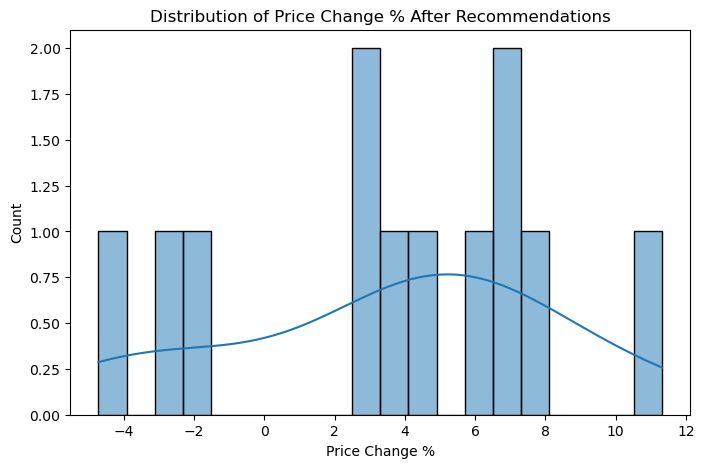

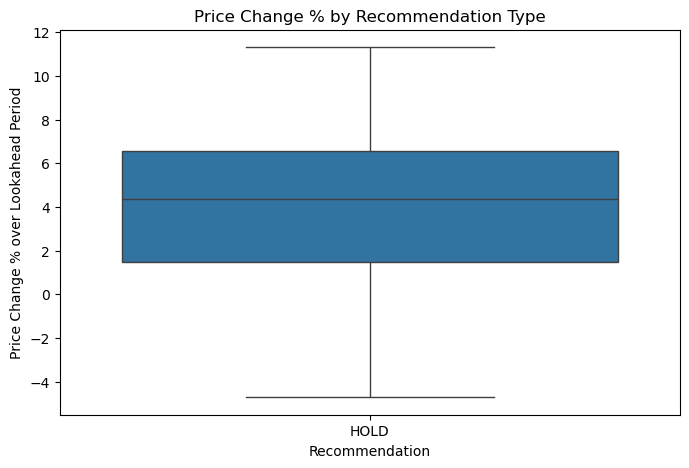

No BUY signals to evaluate.
Processed evaluation summary saved.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the latest batch backtest file
eval_dir = Path("../evaluation")
latest_file = sorted(eval_dir.glob("batch_backtest_*.csv"))[-1]
df = pd.read_csv(latest_file)
print(f"Loaded {latest_file} with {len(df)} records.")

# Display head
df.head()

# Basic statistics
print(df.describe())
print(df['recommendation'].value_counts())

# Histogram: Price change distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price_change_%'].dropna(), bins=20, kde=True)
plt.title('Distribution of Price Change % After Recommendations')
plt.xlabel('Price Change %')
plt.ylabel('Count')
plt.show()

# Recommendation vs Price Change
plt.figure(figsize=(8,5))
sns.boxplot(x='recommendation', y='price_change_%', data=df)
plt.title('Price Change % by Recommendation Type')
plt.ylabel('Price Change % over Lookahead Period')
plt.xlabel('Recommendation')
plt.show()

# Evaluation metric: how often BUY led to positive returns
buy_signals = df[df['recommendation'] == 'BUY']
buy_positive = buy_signals[buy_signals['price_change_%'] > 0]
if len(buy_signals) > 0:
    buy_accuracy = len(buy_positive) / len(buy_signals) * 100
    print(f"BUY signal accuracy: {buy_accuracy:.2f}% ({len(buy_positive)}/{len(buy_signals)})")
else:
    print("No BUY signals to evaluate.")

# Save processed evaluation for report use
df.to_csv(eval_dir / "processed_evaluation_summary.csv", index=False)
print("Processed evaluation summary saved.")
